In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from numpy.linalg import eigvals
from scipy.integrate import solve_ivp
import os
from tqdm import tqdm

Canard point: -4.259310344827586


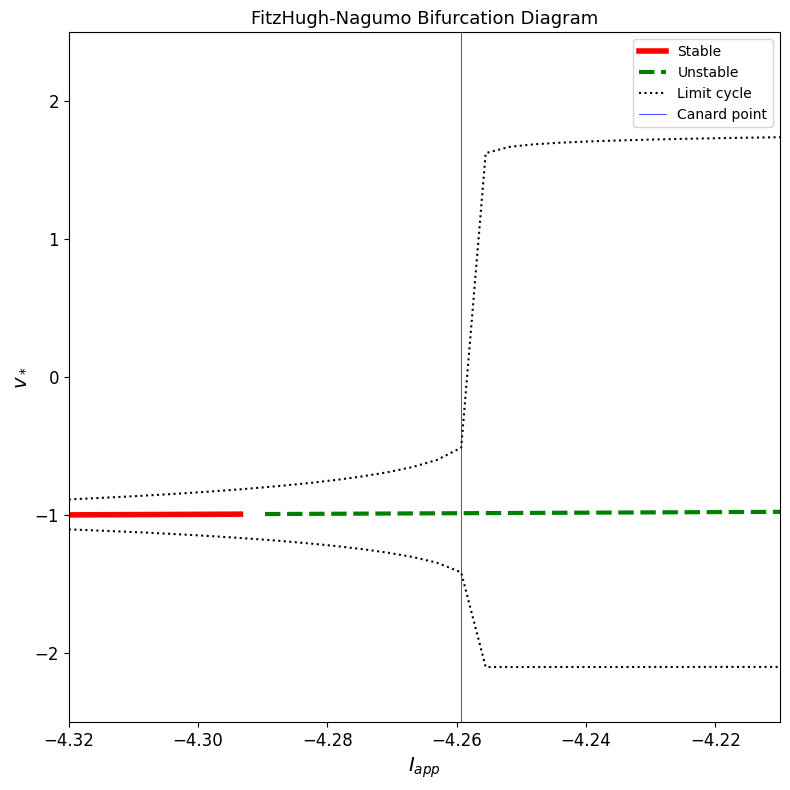

Canard point: -4.259310344827586


In [3]:
#BIFURCATION DIAGRAM PLOTTING
#Parameters
a = 5
tau_n = 60
# a = 1.25
# tau_n = 25
I_values = np.linspace(-4.32, -4.21, 30)
# I_values = np.linspace(-10, 10, 30)


def fhn_nullcline(v, I, a):
    return v - (v**3) / 3 + I - a * v
def fh_n(t, y, a, tau_n, I):
    v, n = y
    dvdt = v - (v**3) / 3 - n + I
    dndt = (a * v - n) / tau_n
    return [dvdt, dndt]
def jacobian(v_star, n_star, a, tau_n):
    df1dv = 1 - v_star**2
    df1dn = -1
    df2dv = a / tau_n
    df2dn = -1 / tau_n
    return np.array([[df1dv, df1dn],
                     [df2dv, df2dn]])

stable_pts = []
unstable_pts = []
I_stable = []
I_unstable = []

v_max_list = []
v_min_list = []
I_cycle_list = []

canard_point = 0

t_span = (0, 200)
y0 = [-0.5, -4.0]

# i = 0
for I in I_values:
    sol = solve_ivp(fh_n, t_span, y0, args=(a, tau_n, I),
                    max_step=0.1, rtol=1e-6, atol=1e-8)

    t = sol.t
    v = sol.y[0]

    #use last 50% of data
    cutoff = int(0.5 * len(v))
    v_tail = v[cutoff:]

    v_max = np.max(v_tail)
    v_min = np.min(v_tail)

    v_max_list.append(v_max)
    v_min_list.append(v_min)
    I_cycle_list.append(I)
    # if canard_point == 0 and i >= 1 and abs(v_max_list[i] - v_min_list[i]) - abs(v_max_list[i-1] - v_min_list[i-1]) > 0.5:
    #     canard_point = I

    guesses = np.linspace(-3, 3, 10)
    v_roots = []

    for guess in guesses:
        v_star, = fsolve(fhn_nullcline, guess, args=(I, a))
        if not any(np.isclose(v_star, root, atol=1e-4) for root in v_roots):
            v_roots.append(v_star)

    for v_star in v_roots:
        n_star = a * v_star
        J = jacobian(v_star, n_star, a, tau_n)
        eigenvalues = eigvals(J)
        if np.all(np.real(eigenvalues) < 0):
            stable_pts.append(v_star)
            I_stable.append(I)
        else:
            unstable_pts.append(v_star)
            I_unstable.append(I)
    # i += 1
    
for i in range(len(v_max_list) - 2):
    if canard_point == 0 and abs(v_max_list[i+1] - v_min_list[i+1]) - abs(v_max_list[i-1] - v_min_list[i-1]) > 0.5:
        canard_point = I_cycle_list[i]

# Plotting
plt.figure(figsize=(8, 8))

plt.plot(I_stable, stable_pts, 'r-', linewidth=4, label='Stable')
plt.plot(I_unstable, unstable_pts, 'g--', linewidth=3, label='Unstable')

plt.plot(I_cycle_list, v_max_list, 'k:', linewidth=1.5, label='Limit cycle')
plt.plot(I_cycle_list, v_min_list, 'k:', linewidth=1.5)

plt.axvline(x=canard_point, color='b', linewidth=0.5, label='Canard point')
plt.xlabel('$I_{app}$', fontsize=14)
plt.ylabel('$v_*$', fontsize=14)
plt.xlim([I_values[0], I_values[-1]])
plt.ylim([-2.5, 2.5])
# plt.ylim([-10, 10])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('FitzHugh-Nagumo Bifurcation Diagram', fontsize=13)
plt.grid(False)
plt.legend(loc='best', fontsize=10)
plt.tight_layout()
print('Canard point:', canard_point)


file_path = '../assets/FHN_bifurcation.png'


plt.savefig(file_path, dpi=300)  # Must go before plt.show()
plt.show()

print('Canard point:', canard_point)



In [54]:
def fhn_nullcline(v, I, a):
    return v - (v**3) / 3 + I - a * v

def fh_n(t, y, a, tau_n, I):
    v, n = y
    dvdt = v - (v**3) / 3 - n + I
    dndt = (a * v - n) / tau_n
    return [dvdt, dndt]

#parameters
a_vals = [4,5,6,7,8]#multiple a values
tau_n_vals = np.linspace(25, 85, 60)#use 2 to find range
I_length = 100
# I_values = np.linspace(-4.5, -3.5, 10)
t_span = (0, 200)
y0 = [-0.5, -4.0]
canard_matrix = np.zeros((len(a_vals), len(tau_n_vals)))


#progress bar from GPT 4o
total_iterations = len(a_vals) * len(tau_n_vals) * I_length
with tqdm(total=total_iterations, desc="Computing canard matrix") as pbar:
    for i, a in enumerate(a_vals):
        canard_curve = np.zeros(len(tau_n_vals))
        if a == 1:
            I_values = np.linspace(-0.7, -0.25, I_length)
        elif a == 2:
            I_values = np.linspace(-1.33, -1.28, I_length)
        elif a == 3:
            I_values = np.linspace(-2.35, -2.25, I_length)
        elif a == 4:
            I_values = np.linspace(-3.3, -3.18, I_length)
        elif a == 5:
            I_values = np.linspace(-4.3, -4.1, I_length)
        elif a == 6:
            I_values = np.linspace(-5.3, -4.9, I_length)
        elif a == 7:
            I_values = np.linspace(-6.3, -5.5, I_length)
        elif a == 8:
            I_values = np.linspace(-7.3, -6.8, I_length)
        elif a == 9:
            I_values = np.linspace(-8.3, -5.0, I_length)
        elif a == 10:
            I_values = np.linspace(-9.3, -5.0, I_length)#least optimal way to code this I know

        for j, tau_n in enumerate(tau_n_vals):
            v_max_list = []
            v_min_list = []
            I_cycle_list = []

            for I in I_values:
                sol = solve_ivp(fh_n, t_span, y0, args=(a, tau_n, I),
                                max_step=0.1, rtol=1e-6, atol=1e-8)

                v = sol.y[0]
                cutoff = int(0.5 * len(v))
                v_tail = v[cutoff:]
                v_max_list.append(np.max(v_tail))
                v_min_list.append(np.min(v_tail))
                I_cycle_list.append(I)

                pbar.update(1)

            #detect canard explosion
            for k in range(1, len(v_max_list) - 2):
                amp_now = abs(v_max_list[k+1] - v_min_list[k+1])
                amp_prev = abs(v_max_list[k - 1] - v_min_list[k - 1])
                if (amp_now - amp_prev) > 0.5:
                    canard_curve[j] = I_cycle_list[k]
                    break#stop after 1st detection
                else:
                    canard_curve[j] = np.nan
            canard_matrix[i, j] = canard_curve[j]


Computing canard matrix: 100%|██████████| 30000/30000 [50:42<00:00,  9.86it/s] 


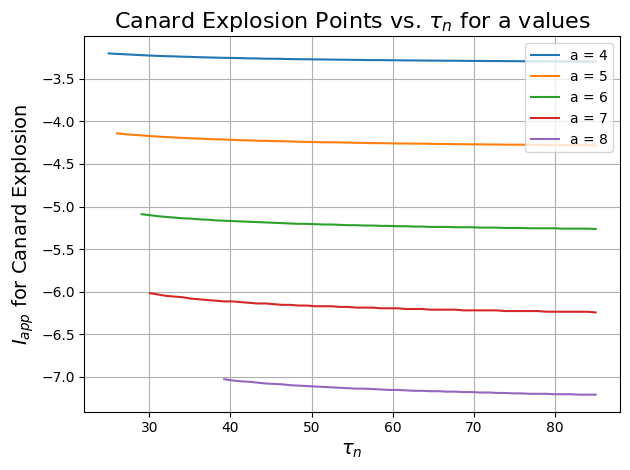

In [57]:
#PLOTTING
# plt.figure(figsize=(10, 6))
# print(canard_matrix)
for i in range(0,len(a_vals)):
    plt.plot(tau_n_vals, canard_matrix[i], label=f'a = {a_vals[i]}')

plt.title(r'Canard Explosion Points vs. $\tau_n$ for a values', fontsize=16)
plt.xlabel(r'$\tau_n$', fontsize=14)
plt.ylabel(r'$I_{app}$ for Canard Explosion', fontsize=14)
plt.legend(loc = 'upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# [[-3.20181818 -3.20787879 -3.21272727 -3.21757576 -3.22242424 -3.22727273
#   -3.23090909 -3.23454545 -3.2369697  -3.24060606 -3.2430303  -3.24666667
#   -3.24909091 -3.25151515 -3.25393939 -3.25515152 -3.25757576 -3.26
#   -3.26121212 -3.26363636 -3.26484848 -3.26606061 -3.26848485 -3.26969697
#   -3.27090909 -3.27212121 -3.27333333 -3.27454545 -3.27575758 -3.2769697
#   -3.27818182 -3.27939394 -3.28060606 -3.28060606 -3.28181818 -3.2830303
#   -3.28424242 -3.28424242 -3.28545455 -3.28666667 -3.28666667 -3.28787879
#   -3.28787879 -3.28909091 -3.29030303 -3.29030303 -3.29151515 -3.29151515
#   -3.29272727 -3.29272727 -3.29393939 -3.29393939 -3.29393939 -3.29515152
#   -3.29515152 -3.29636364 -3.29636364 -3.29636364 -3.29757576 -3.29757576]
#  [        nan -4.14040404 -4.15050505 -4.15858586 -4.16464646 -4.17272727
#   -4.17878788 -4.18484848 -4.18888889 -4.19494949 -4.1989899  -4.2030303
#   -4.20707071 -4.21111111 -4.21313131 -4.21717172 -4.22121212 -4.22323232
#   -4.22727273 -4.22929293 -4.23131313 -4.23333333 -4.23535354 -4.23939394
#   -4.24141414 -4.24343434 -4.24545455 -4.24545455 -4.24747475 -4.24949495
#   -4.25151515 -4.25353535 -4.25555556 -4.25555556 -4.25757576 -4.25959596
#   -4.25959596 -4.26161616 -4.26161616 -4.26363636 -4.26565657 -4.26565657
#   -4.26767677 -4.26767677 -4.26969697 -4.26969697 -4.27171717 -4.27171717
#   -4.27373737 -4.27373737 -4.27373737 -4.27575758 -4.27575758 -4.27777778
#   -4.27777778 -4.27777778 -4.27979798 -4.27979798 -4.27979798 -4.28181818]
#  [        nan         nan         nan         nan -5.08989899 -5.1020202
#   -5.11414141 -5.12222222 -5.13030303 -5.13838384 -5.14242424 -5.15050505
#   -5.15454545 -5.16262626 -5.16666667 -5.17070707 -5.17474747 -5.17878788
#   -5.18282828 -5.18686869 -5.19090909 -5.19494949 -5.1989899  -5.2030303
#   -5.2030303  -5.20707071 -5.21111111 -5.21111111 -5.21515152 -5.21919192
#   -5.21919192 -5.22323232 -5.22323232 -5.22727273 -5.22727273 -5.23131313
#   -5.23131313 -5.23535354 -5.23535354 -5.23939394 -5.23939394 -5.23939394
#   -5.24343434 -5.24343434 -5.24343434 -5.24747475 -5.24747475 -5.24747475
#   -5.25151515 -5.25151515 -5.25151515 -5.25555556 -5.25555556 -5.25555556
#   -5.25555556 -5.25959596 -5.25959596 -5.25959596 -5.25959596 -5.26363636]
#  [        nan         nan         nan         nan         nan -6.01717172
#   -6.03333333 -6.04949495 -6.05757576 -6.06565657 -6.08181818 -6.08989899
#   -6.0979798  -6.10606061 -6.11414141 -6.11414141 -6.12222222 -6.13030303
#   -6.13838384 -6.13838384 -6.14646465 -6.15454545 -6.15454545 -6.16262626
#   -6.16262626 -6.17070707 -6.17070707 -6.17070707 -6.17878788 -6.17878788
#   -6.18686869 -6.18686869 -6.18686869 -6.19494949 -6.19494949 -6.19494949
#   -6.2030303  -6.2030303  -6.2030303  -6.21111111 -6.21111111 -6.21111111
#   -6.21111111 -6.21919192 -6.21919192 -6.21919192 -6.21919192 -6.21919192
#   -6.22727273 -6.22727273 -6.22727273 -6.22727273 -6.22727273 -6.23535354
#   -6.23535354 -6.23535354 -6.23535354 -6.23535354 -6.23535354 -6.24343434]
#  [        nan         nan         nan         nan         nan         nan
#           nan         nan         nan         nan         nan         nan
#           nan         nan -7.02727273 -7.04242424 -7.05252525 -7.05757576
#   -7.06767677 -7.07777778 -7.08282828 -7.08787879 -7.0979798  -7.1030303
#   -7.10808081 -7.11313131 -7.11818182 -7.12323232 -7.12828283 -7.13333333
#   -7.13838384 -7.13838384 -7.14343434 -7.14848485 -7.15353535 -7.15353535
#   -7.15858586 -7.16363636 -7.16363636 -7.16868687 -7.16868687 -7.17373737
#   -7.17373737 -7.17878788 -7.17878788 -7.18383838 -7.18383838 -7.18888889
#   -7.18888889 -7.19393939 -7.19393939 -7.1989899  -7.1989899  -7.1989899
#   -7.2040404  -7.2040404  -7.2040404  -7.20909091 -7.20909091 -7.20909091]]
#FOR SAFEKEEPING (TOOK 50 MINUTES TO RUN)

In [51]:
def fhn_nullcline(v, I, a):
    return v - (v**3) / 3 + I - a * v

def fh_n(t, y, a, tau_n, I):
    v, n = y
    dvdt = v - (v**3) / 3 - n + I
    dndt = (a * v - n) / tau_n
    return [dvdt, dndt]


##parameters
a_vals = [7]
# tau_n_vals = np.linspace(25, 85, 60)
tau_n_vals = np.linspace(25, 85, 60)
# I_values = np.linspace(-0.7, -0.25, 50)#good for a = 1
# I_values = np.linspace(-1.33, -1.28, 50)#good for a = 2
# I_values = np.linspace(-2.35, -2.25, 50)#good for a = 3
# I_values = np.linspace(-3.3, -3.18, 50)#good for a = 4
# I_values = np.linspace(-4.3, -4.1, 50)#good for a = 5
# I_values = np.linspace(-5.3, -4.9, 50)#good for a = 6
I_values = np.linspace(-6.3, -5.0, 50)#good for a = 7
# I_values = np.linspace(-7.3, -6.8, 100)#good for a = 8
# I_values = np.linspace(-8.3, -5.0, 50)#good for a = 9
# I_values = np.linspace(-9.3, -5.0, 50)#good for a = 10


canard_matrix = np.zeros((len(a_vals), len(tau_n_vals)))


t_span = (0, 200)
y0 = [-0.5, -4.0]

##progress bar coutesy of GPT 4o
total_iterations = len(a_vals) * len(tau_n_vals) * len(I_values)
with tqdm(total=total_iterations, desc="Computing canard matrix") as pbar:
    for i, a in enumerate(a_vals):
        for j, tau_n in enumerate(tau_n_vals):
            v_max_list = []
            v_min_list = []
            I_cycle_list = []

            for I in I_values:
                sol = solve_ivp(fh_n, t_span, y0, args=(a, tau_n, I), max_step=0.1, rtol=1e-6, atol=1e-8)

                v = sol.y[0]
                cutoff = int(0.5 * len(v))
                v_tail = v[cutoff:]
                v_max_list.append(np.max(v_tail))
                v_min_list.append(np.min(v_tail))
                I_cycle_list.append(I)

                pbar.update(1)

            #detect canard explosion
            for k in range(2, len(v_max_list) - 2):
                amp_now = abs(v_max_list[k + 1] - v_min_list[k + 1])
                amp_prev = abs(v_max_list[k - 1] - v_min_list[k - 1])
                # print(amp_now, amp_prev)
                if (amp_now-amp_prev)>0.5:
                    canard_matrix[i][j] = I_cycle_list[k]
                    break#stop after 1st detection


Computing canard matrix:   0%|          | 0/3000 [00:00<?, ?it/s]

Computing canard matrix: 100%|██████████| 3000/3000 [05:08<00:00,  9.73it/s]


[-5.98163265 -6.00816327 -6.00816327 -6.03469388 -6.03469388 -6.06122449
 -6.06122449 -6.0877551  -6.0877551  -6.11428571 -6.11428571 -6.11428571
 -6.11428571 -6.14081633 -6.14081633 -6.14081633 -6.14081633 -6.16734694
 -6.16734694 -6.16734694 -6.16734694 -6.16734694 -6.16734694 -6.19387755
 -6.19387755 -6.19387755 -6.19387755 -6.19387755 -6.19387755 -6.19387755
 -6.19387755 -6.22040816 -6.22040816 -6.22040816 -6.22040816 -6.22040816
 -6.22040816 -6.22040816 -6.22040816 -6.22040816 -6.22040816 -6.22040816
 -6.22040816 -6.22040816 -6.24693878 -6.24693878 -6.24693878 -6.24693878
 -6.24693878 -6.24693878 -6.24693878 -6.24693878 -6.24693878 -6.24693878
 -6.24693878 -6.24693878 -6.24693878 -6.24693878 -6.24693878 -6.24693878]
[25.         26.01694915 27.03389831 28.05084746 29.06779661 30.08474576
 31.10169492 32.11864407 33.13559322 34.15254237 35.16949153 36.18644068
 37.20338983 38.22033898 39.23728814 40.25423729 41.27118644 42.28813559
 43.30508475 44.3220339  45.33898305 46.3559322  4

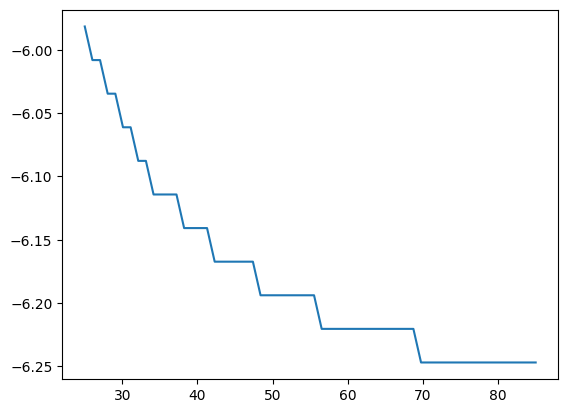

In [52]:
print(canard_matrix[:][0])
print(tau_n_vals)
plt.plot(tau_n_vals, canard_matrix[:][0])

In [190]:
#abandoned
# fig, ax = plt.subplots(figsize=(8, 6))
# c = ax.imshow(canard_matrix, aspect='auto', origin='lower',
#               extent=[tau_n_vals[0], tau_n_vals[-1], a_vals[0], a_vals[-1]],
#               cmap='viridis')

# # Axis labels and ticks
# ax.set_xlabel(r'$\tau_n$', fontsize=14)
# ax.set_ylabel(r'$a$', fontsize=14)
# ax.set_title('Canard Explosion Threshold $I_{app}$', fontsize=16)

# # Colorbar
# cb = plt.colorbar(c, ax=ax)
# cb.set_label(r'$I_{app}$ for Canard Explosion', fontsize=12)

# plt.tight_layout()
# plt.show()